**© Jesús López**

Ask him any doubt on **[Twitter](https://twitter.com/jsulopzs)** or **[LinkedIn](https://linkedin.com/in/jsulopzs)**

# #01 | Machine Learning & Linear Regression

## Chapter Importance

Machine Learning is all about calculating [the best numbers](https://twitter.com/sotastica/status/1449735653328031745) of a mathematical equation by [minimizing the distance between real data and predictions](https://www.youtube.com/watch?v=Ht3rYS-JilE).

The form of a Linear Regression mathematical equation is as follows:

$$
y = (a) + (b) \cdot x
$$

As we see in the following plot, **not any mathematical equation is valid**; the red line doesn't fit the real data (blue points) as well as the green one.

<center>
<img src="src/linear-regression.jpeg" width="400" align="center">
</center>

How do we understand the development of Machine Learning models in Python **to predict what may happen in the future**?

This tutorial covers the topics described below using **USA Car Crashes data** to predict the accidents based on alcohol.

1. Step by step procedure to compute a Linear Regression:
    1. `.fit()` the numbers of the mathematical equation
    2. `.predict()` the future with the mathematical equation
    3. `.score()` how good is the mathematical equation
2. How to **visualize** the Linear Regression model?
3. How to **evaluate** Regression models step by step?
    - Residuals Sum of Squares
    - Total Sum of Squares
    - R Squared Ratio $R^2$
4. How to **interpret** the coeficients of the Linear Regression?
5. Compare the Linear Regression to other Machine Learning models such as:
    - Random Forest
    - Support Vector Machines
6. Why **we don't need to know the maths** behind every model to apply Machine Learning in Python?

## [ ] Load the Data

- This dataset contains **statistics about Car Accidents** (columns)
- In each one of **USA States** (rows)

Visit [this website](https://www.kaggle.com/fivethirtyeight/fivethirtyeight-bad-drivers-dataset/) if you want to know the measures of the columns.

In [2]:
import seaborn as sns #!

df_crashes = sns.load_dataset(name='car_crashes', index_col='abbrev')[['alcohol', 'total']]
df_crashes.rename({'total': 'accidents'}, axis=1, inplace=True)
df_crashes.head(4)

,alcohol,accidents
abbrev,,
AL,5.640,18.8
AK,4.525,18.1
AZ,5.208,18.6
AR,5.824,22.4


## How do we compute a `LinearRegression` Model in Python?

### Import the Class

In [3]:
from sklearn.linear_model import LinearRegression

### Instantiate the Class

In [4]:
model = LinearRegression()

### Fit the Model

In [5]:
model.fit()

TypeError: LinearRegression.fit() missing 2 required positional arguments: 'X' and 'y'

### Separate the Variables

In [44]:
target = df_crashes.accidents

In [45]:
explanatory = df_crashes[['alcohol']]

### Fit the Model Again

In [46]:
model=LinearRegression()

In [47]:
model.fit(y=target, X=explanatory)

LinearRegression()

In [48]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['alcohol'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([2.0325063]),
 'rank_': 1,
 'singular_': array([12.22681605]),
 'intercept_': 5.8577761548263005}

In [13]:
accidents= model.intercept_ + model.coef_ * df_crashes.alcohol

### [ ] Predictions

#### Calculate the Predictions

In [14]:
model.predict(X=explanatory)

array([17.32111171, 15.05486718, 16.44306899, 17.69509287, 12.68699734,
       13.59756016, 13.76016066, 15.73575679,  9.0955587 , 16.40851638,
       13.78455074, 20.44100889, 14.87600663, 14.70324359, 14.40446516,
       13.8353634 , 14.54064309, 15.86177218, 19.6076813 , 15.06502971,
       13.98780137, 11.69106925, 13.88211104, 11.5162737 , 16.94713055,
       16.98371566, 24.99585551, 16.45729653, 15.41868581, 12.93089809,
       12.23171592, 15.95526747, 13.10772614, 16.44306899, 26.26007443,
       15.60161138, 17.58737003, 12.62195713, 17.32517672, 14.43088774,
       25.77430543, 18.86988151, 17.3515993 , 20.84141263,  9.53254755,
       14.15040187, 12.82724027, 12.96748321, 19.40239816, 15.11380986,
       17.17477126])

#### Add a New Column with the Predictions

In [15]:
df_crashes['prediction'] = model.predict(X=explanatory)

In [16]:
df_crashes.head()

,alcohol,accidents,prediction
abbrev,,,
AL,5.640,18.8,17.321112
AK,4.525,18.1,15.054867
AZ,5.208,18.6,16.443069
AR,5.824,22.4,17.695093
CA,3.360,12.0,12.686997


### Model Visualization

In [17]:
import seaborn as sns

<AxesSubplot: xlabel='alcohol', ylabel='accidents'>

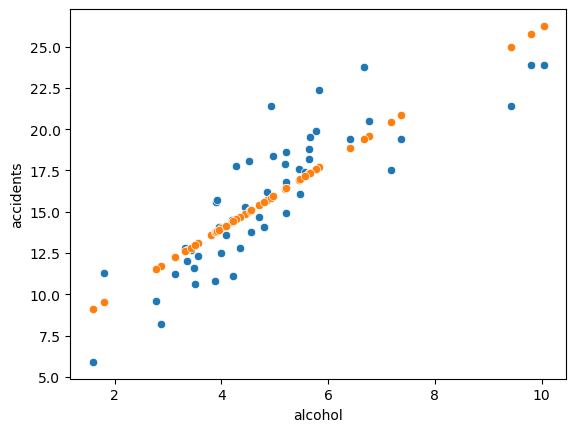

In [18]:
sns.scatterplot(data=df_crashes,x='alcohol',y='accidents')
sns.scatterplot(data=df_crashes,x='alcohol',y='prediction')

### [ ] Model's Score

#### Calculate the Score

In [19]:
explanatory.head()

,alcohol
abbrev,
AL,5.640
AK,4.525
AZ,5.208
AR,5.824
CA,3.360


In [20]:
model.score(X=explanatory, y=target)

0.7269492966665405

#### Explain the Score

##### Residuals

In [22]:
df_crashes['residual'] = df_crashes.accidents - df_crashes.prediction

In [25]:
df_crashes.residual.sum().round(2)

0.0

In [26]:
df_crashes['residual2']=df_crashes.residual**2

In [32]:
RSS = df_crashes.residual2.sum()

##### Target's Variation

In [34]:
TSS = ((df_crashes.accidents - df_crashes.accidents.mean())**2).sum()

In [36]:
1 - RSS/TSS

0.7269492966665405

In [37]:
model.score(X=explanatory, y=target)

0.7269492966665405

##### The Ratio

### [ ] Model Interpretation

In [41]:
df_crashes.head()

,alcohol,accidents,prediction,residual,residual2
abbrev,,,,,
AL,5.640,18.8,17.321112,1.478888,2.187111
AK,4.525,18.1,15.054867,3.045133,9.272834
AZ,5.208,18.6,16.443069,2.156931,4.652351
AR,5.824,22.4,17.695093,4.704907,22.136151
CA,3.360,12.0,12.686997,-0.686997,0.471965


<AxesSubplot: xlabel='alcohol', ylabel='accidents'>

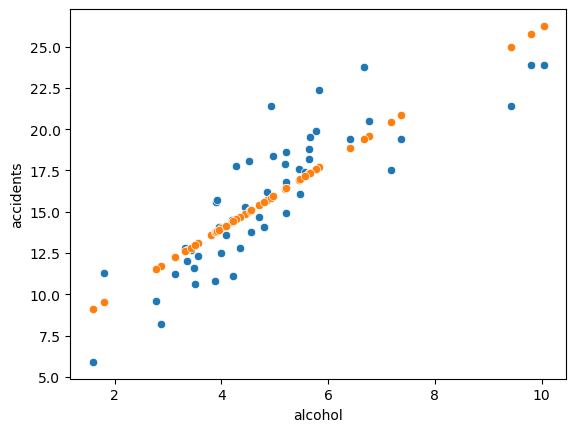

In [42]:
sns.scatterplot(data=df_crashes,x='alcohol',y='accidents')
sns.scatterplot(data=df_crashes,x='alcohol',y='prediction')

In [49]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['alcohol'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([2.0325063]),
 'rank_': 1,
 'singular_': array([12.22681605]),
 'intercept_': 5.8577761548263005}

## [ ] Other Regression Models

In [51]:
from sklearn.ensemble import RandomForestRegressor

In [55]:
model_rf = RandomForestRegressor()

#### Fit the Model

In [64]:
model_rf.fit(X=explanatory, y = target)

RandomForestRegressor()

#### Calculate Predictions

In [65]:
model_rf.predict(X=explanatory)

array([18.737     , 16.838     , 17.46037143, 21.208     , 12.169     ,
       13.36      , 12.57      , 17.632     ,  7.788     , 17.69957143,
       14.49      , 18.712     , 15.075     , 14.691     , 13.956     ,
       15.139     , 15.687     , 20.042     , 21.386     , 15.766     ,
       13.294     ,  8.84      , 14.548     ,  9.414     , 17.312     ,
       16.727     , 22.221     , 15.9116    , 14.685     , 11.542     ,
       11.535     , 18.975     , 11.882     , 17.46037143, 23.571     ,
       14.728     , 20.258     , 12.553     , 18.497     , 12.614     ,
       23.571     , 20.76      , 19.089     , 19.491     ,  9.948     ,
       13.519     , 12.315     , 11.202     , 22.376     , 14.64      ,
       17.823     ])

In [70]:
df_crashes['pred_rf'] = model_rf.predict(X=explanatory)
df_crashes.head()

,alcohol,accidents,prediction,residual,residual2,pred_rf
abbrev,,,,,,
AL,5.640,18.8,17.321112,1.478888,2.187111,18.737000
AK,4.525,18.1,15.054867,3.045133,9.272834,16.838000
AZ,5.208,18.6,16.443069,2.156931,4.652351,17.460371
AR,5.824,22.4,17.695093,4.704907,22.136151,21.208000
CA,3.360,12.0,12.686997,-0.686997,0.471965,12.169000


#### Model's Score

In [76]:
model_rf.score(X=explanatory, y= target)

0.9498119570401352

### `SVR()` in Python

#### Fit the Model

In [77]:
from sklearn.svm import SVR

In [78]:
model_svr= SVR()

#### Calculate Predictions

In [81]:
model_svr.fit(X=explanatory, y = target)

SVR()

In [82]:
model_svr.predict(X=explanatory)

array([18.29570777, 15.18462721, 17.2224187 , 18.6633175 , 12.12434781,
       13.10691581, 13.31612684, 16.21131216, 12.66062465, 17.17537208,
       13.34820949, 19.38920329, 14.91415215, 14.65467023, 14.2131504 ,
       13.41560202, 14.41299448, 16.39752499, 19.4896662 , 15.20002787,
       13.62200798, 11.5390483 , 13.47824339, 11.49818909, 17.87053595,
       17.9144274 , 19.60736085, 17.24170425, 15.73585463, 12.35136579,
       11.784815  , 16.53431108, 12.53373232, 17.2224187 , 19.4773929 ,
       16.01115736, 18.56379706, 12.06891287, 18.30002795, 14.25171609,
       19.59597679, 19.37950461, 18.32794218, 19.29994413, 12.26345665,
       13.84847453, 12.25128025, 12.38791686, 19.48212198, 15.27397732,
       18.1357253 ])

In [83]:
df_crashes['pred_svr'] = model_svr.predict(X=explanatory)

In [84]:
model_svr.score(X=explanatory,y= target)

0.7083438012012768

<AxesSubplot: xlabel='alcohol', ylabel='accidents'>

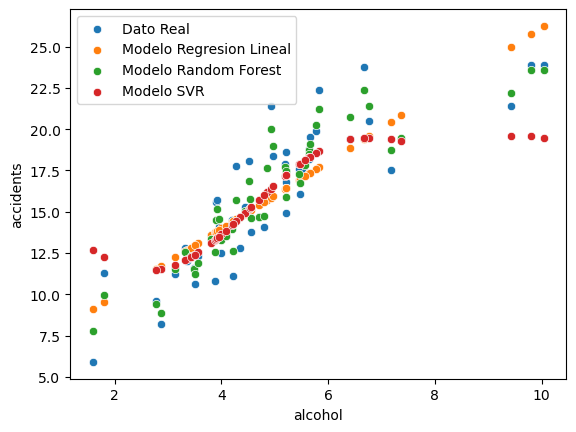

In [96]:
sns.scatterplot(data=df_crashes,x='alcohol',y='accidents', label= "Dato Real")
sns.scatterplot(data=df_crashes,x='alcohol',y='prediction', label= 'Modelo Regresion Lineal')
sns.scatterplot(data=df_crashes,x='alcohol',y='pred_rf', label='Modelo Random Forest')
sns.scatterplot(data=df_crashes,x='alcohol',y='pred_svr', label= 'Modelo SVR')

<a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-nd/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/">Creative Commons Attribution-NonCommercial-NoDerivatives 4.0 International License</a>.